# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = requests.get(url)
    #city_json = city_url.json()
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    city_json = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | putina
Processing Record 4 of Set 1 | cacimba de dentro
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | estherville
Processing Record 7 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | roma
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | suining
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kuqa
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | bardsir
Processing Record 20 of Set 1 | hilo
Processing Record 21 of 

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,279.75,91,100,1.79,US,1702261419
1,port-aux-francais,-49.3500,70.2167,277.27,79,75,9.51,TF,1702261202
2,putina,-15.4667,-69.4333,282.36,72,96,3.90,PE,1702261420
3,cacimba de dentro,-6.6417,-35.7900,294.27,76,1,2.83,BR,1702261420
4,punta arenas,-53.1500,-70.9167,279.21,70,0,1.03,CL,1702261380


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
# Date conversion code from chat GPT
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df['Date'] = (pd.to_datetime(city_data_df['Date'], unit='s')).dt.date
date = city_data_df['Date'][0]

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,279.75,91,100,1.79,US,2023-12-11
1,port-aux-francais,-49.3500,70.2167,277.27,79,75,9.51,TF,2023-12-11
2,putina,-15.4667,-69.4333,282.36,72,96,3.90,PE,2023-12-11
3,cacimba de dentro,-6.6417,-35.7900,294.27,76,1,2.83,BR,2023-12-11
4,punta arenas,-53.1500,-70.9167,279.21,70,0,1.03,CL,2023-12-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

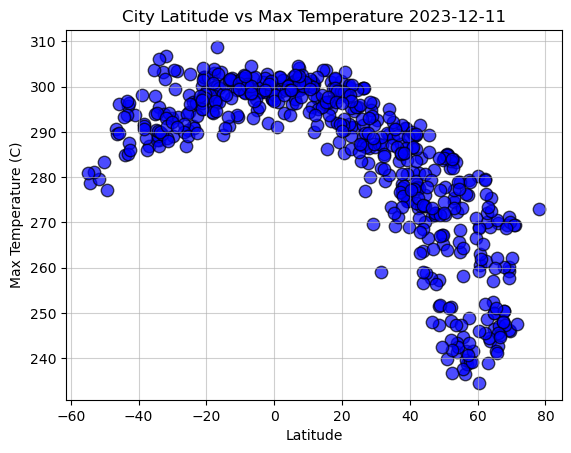

In [25]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat'].astype(float)
y_values = city_data_df['Max Temp'].astype(float)
plt.scatter(x_values, y_values, c='blue', marker='o', edgecolors='black', s=80, alpha=0.7)
plt.grid(True, alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Max Temperature {date}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

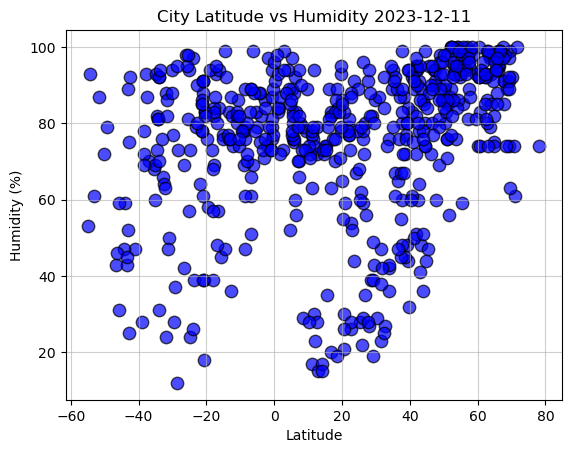

In [27]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat'].astype(float)
y_values = city_data_df['Humidity'].astype(float)
plt.scatter(x_values, y_values, c='blue', marker='o', edgecolors='black', s=80, alpha=0.7)
plt.grid(True, alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {date}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

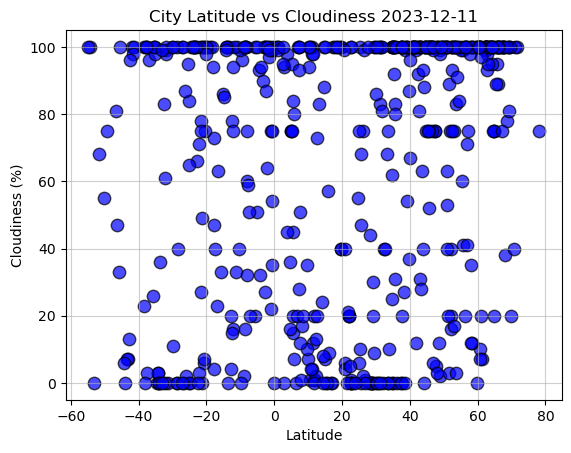

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat'].astype(float)
y_values = city_data_df['Cloudiness'].astype(float)
plt.scatter(x_values, y_values, c='blue', marker='o', edgecolors='black', s=80, alpha=0.7)
plt.grid(True, alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {date}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

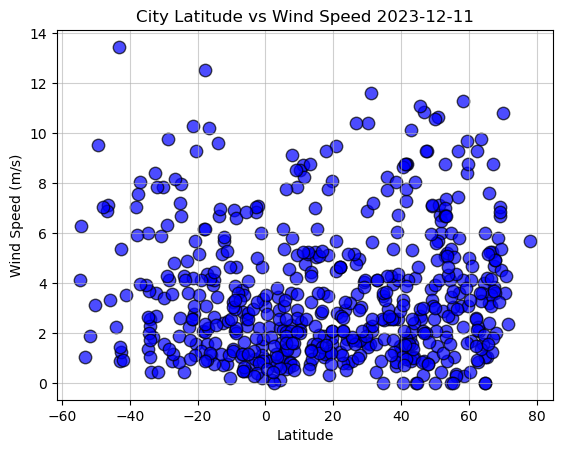

In [81]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat'].astype(float)
y_values = city_data_df['Wind Speed'].astype(float)
plt.scatter(x_values, y_values, c='blue', marker='o', edgecolors='black', s=80, alpha=0.7)
plt.grid(True, alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed {date}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_values, y_values, c='skyblue', marker='o', edgecolors='black', s=80, alpha=0.5)
    plt.grid(True, alpha = 0.5)
    plt.plot(x_values, regress_values, "r-")
    plt.title(f"{title} {date}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    x_coord = min(x_values)
    y_coord = min(y_values)

    plt.annotate(line_eq, (x_coord, y_coord), fontsize=15, color="darkred")

    print(f"R squared: {rvalue**2}")
    plt.show()

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,279.75,91,100,1.79,US,2023-12-11
5,estherville,43.4016,-94.8328,267.35,92,0,2.06,US,2023-12-11
7,roma,43.2128,-75.4557,277.25,96,100,1.54,US,2023-12-11
8,iqaluit,63.7506,-68.5145,269.00,73,100,9.77,CA,2023-12-11
9,suining,30.5080,105.5733,286.89,79,100,2.19,CN,2023-12-11


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,277.27,79,75,9.51,TF,2023-12-11
2,putina,-15.4667,-69.4333,282.36,72,96,3.90,PE,2023-12-11
3,cacimba de dentro,-6.6417,-35.7900,294.27,76,1,2.83,BR,2023-12-11
4,punta arenas,-53.1500,-70.9167,279.21,70,0,1.03,CL,2023-12-11
6,margaret river,-33.9500,115.0667,297.47,29,0,2.54,AU,2023-12-11


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7064705795322466


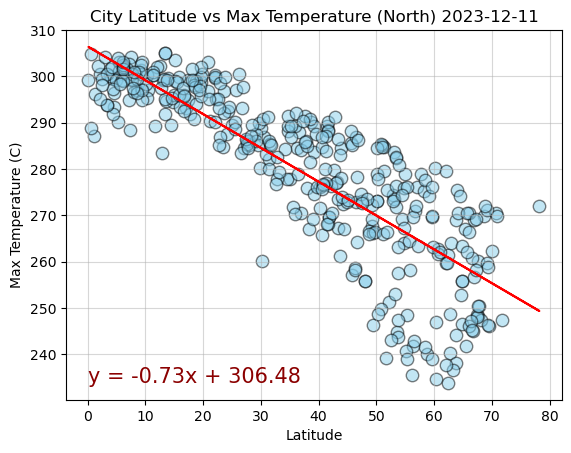

In [120]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype(float)
y_values = northern_hemi_df['Max Temp'].astype(float)

title = "City Latitude vs Max Temperature (North)"
x_label = "Latitude"
y_label = "Max Temperature (C)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

R squared: 0.40826165979572426


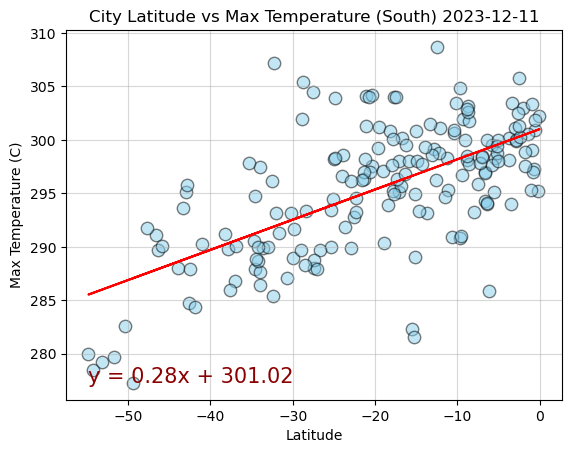

In [121]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype(float)
y_values = southern_hemi_df['Max Temp'].astype(float)

title = "City Latitude vs Max Temperature (South)"
x_label = "Latitude"
y_label = "Max Temperature (C)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The above graphs compare the latitude and maximum temperature recorded for different cities, which have been broken into two groups based on whether they sit in the southern or northern hemisphere. The scatter plots and linear regressions show that there is a positive correlation between proximity to the equator and rising temperatures. For data in the northern hemisphere, the r-squared value shows us that this is a strong correlation, while in the southern hemisphere we see a more moderate correlation. Therefore, we have some evidence to support that temperature rises as you travel south towards the equator, but in the southern hemisphere there may be more factors at play that could influence this relationship (ie ocean currents, etc).

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.15180021163278914


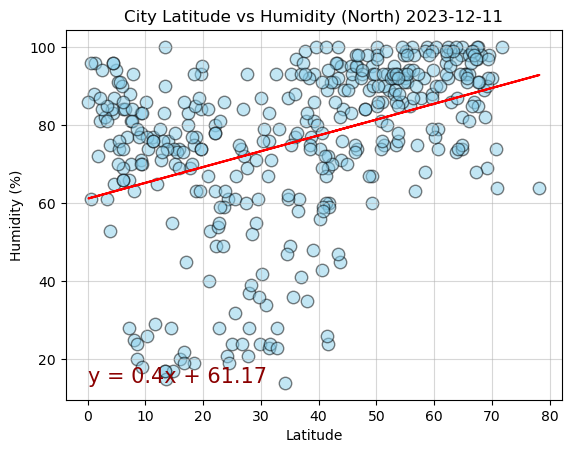

In [122]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype(float)
y_values = northern_hemi_df['Humidity'].astype(float)

title = "City Latitude vs Humidity (North)"
x_label = "Latitude"
y_label = "Humidity (%)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

R squared: 0.05275821416381901


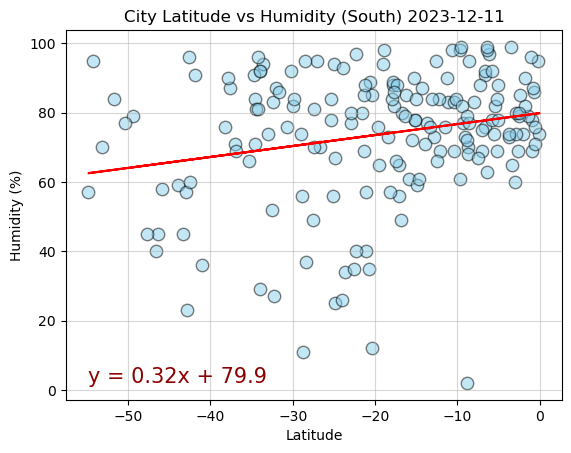

In [123]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype(float)
y_values = southern_hemi_df['Humidity'].astype(float)

title = "City Latitude vs Humidity (South)"
x_label = "Latitude"
y_label = "Humidity (%)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The above graphs compare the latitude and percentage of humidity recorded for different cities, which have been broken into two groups based on whether they sit in the southern or northern hemisphere. The scatter plots and linear regressions show that there is a negative correlation between proximity to the equator and humidity levels in the northern hemisphere, but a positive correlation in the south. For both hemispheres, the r-squared value shows us that this is a weak correlation, especially in the southern hemisphere. Therefore, we can assume that there are other factors outside of location that influence humidity levels, though location may play some part in that.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.08034670156232027


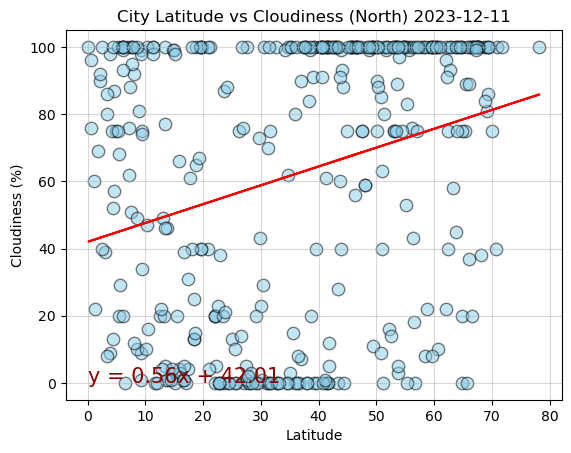

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype(float)
y_values = northern_hemi_df['Cloudiness'].astype(float)

title = "City Latitude vs Cloudiness (North)"
x_label = "Latitude"
y_label = "Cloudiness (%)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

R squared: 0.038503494617962736


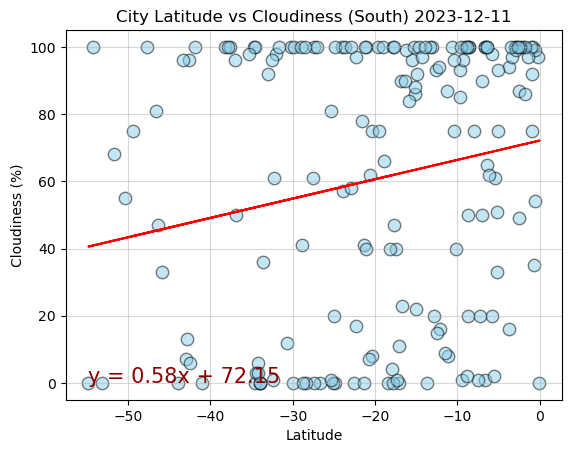

In [125]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype(float)
y_values = southern_hemi_df['Cloudiness'].astype(float)

title = "City Latitude vs Cloudiness (South)"
x_label = "Latitude"
y_label = "Cloudiness (%)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The above graphs compare the latitude and cloud cover recorded for different cities, which have been broken into two groups based on whether they sit in the southern or northern hemisphere. Similar to humidity levels, the scatter plots and linear regressions show that there is a negative correlation between proximity to the equator and cloud cover in the northern hemisphere, but a positive correlation in the south. For both hemispheres, the r-squared value shows us that this is a weak correlation, especially in the southern hemisphere. Therefore, we can assume that there are other factors outside of location that influence cloudiness, though location may play some part in that.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.030393210868626598


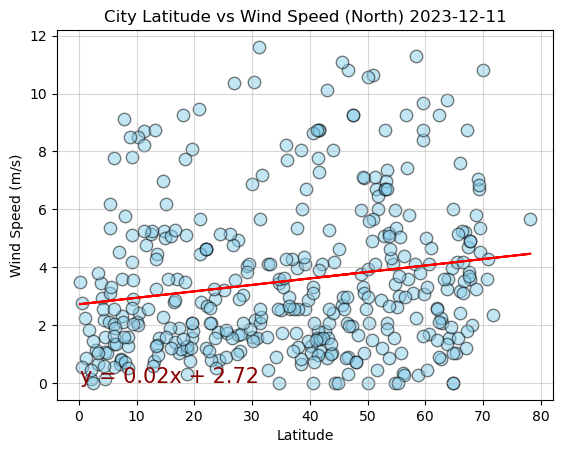

In [126]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype(float)
y_values = northern_hemi_df['Wind Speed'].astype(float)

title = "City Latitude vs Wind Speed (North)"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

R squared: 0.052727240736052255


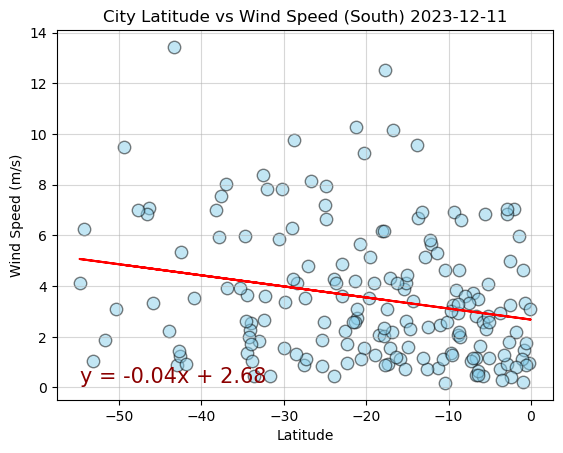

In [127]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype(float)
y_values = southern_hemi_df['Wind Speed'].astype(float)

title = "City Latitude vs Wind Speed (South)"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"

plot_linear_regression(x_values, y_values, title, x_label, y_label)

**Discussion about the linear relationship:** The above graphs compare the latitude and wind speeds recorded for different cities, which have been broken into two groups based on whether they sit in the southern or northern hemisphere. The scatter plots and linear regressions show that there is a negative correlation between proximity to the equator and rising temperatures. However, for both hemispheres the r-squared values show us that this is a weak correlation. Therefore, we have some evidence to support that wind speeds increase as you travel away from the equator, but there are likely other factors at play.